In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [285]:
# Случай: Гусиноозерская станция
df = pd.read_csv('./data_Gus_original.csv', sep=';', encoding="utf-8", decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   TimeUTC                                                     90001 non-null  object 
 1   ГО ГРЭС 3ГТ, Fa, Гц[06222306/FA/none/none]                  89992 non-null  float64
 2   ГО ГРЭС 3ГТ, U1, В[06222306/U+/none/none]                   89097 non-null  float64
 3   ГО ГРЭС 3ГТ, P, Вт[06222306/P/none/none]                    89097 non-null  float64
 4   ГО ГРЭС 3ГТ, Q, вар[06222306/Q/none/none]                   89097 non-null  float64
 5   ГО ГРЭС 3ГТ, Uf, В[06222306/Uf/none/none]                   90001 non-null  float64
 6   ГО ГРЭС 3ГТ, If, А[06222306/If/none/none]                   90001 non-null  float64
 7   ГО ГРЭС 3ГТ, def_P_amp, Вт[06222306/def_P_amp/none/none]    1780 non-null   float64
 

In [286]:
df.columns = ["TimeUTC", "Fg", "Ug", "Pg", "Qg", "Uf", "If", "def_P_amp", "def_P_angl", "def_P_freq"]
df["time"] = ((pd.to_datetime(df["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
df.head()

,TimeUTC,Fg,Ug,Pg,Qg,Uf,If,def_P_amp,def_P_angl,def_P_freq,time
0,11.11.2023 12:20:00.000000,49.987236,9412.046875,169226352.0,45427060.0,272.363800,1358.846191,NaN,NaN,NaN,0.00
1,11.11.2023 12:20:00.020000,49.987206,9411.909180,169167696.0,45398800.0,273.881104,1328.410156,NaN,NaN,NaN,0.02
2,11.11.2023 12:20:00.040000,49.987045,9411.931641,169119872.0,45400228.0,277.519867,1360.392700,NaN,NaN,NaN,0.04
3,11.11.2023 12:20:00.060000,49.987827,9412.221680,169045136.0,45405116.0,275.441193,1360.013794,NaN,NaN,NaN,0.06
4,11.11.2023 12:20:00.080000,49.987617,9412.706055,169008848.0,45413176.0,278.391296,1360.865967,NaN,NaN,NaN,0.08


<Axes: xlabel='time'>

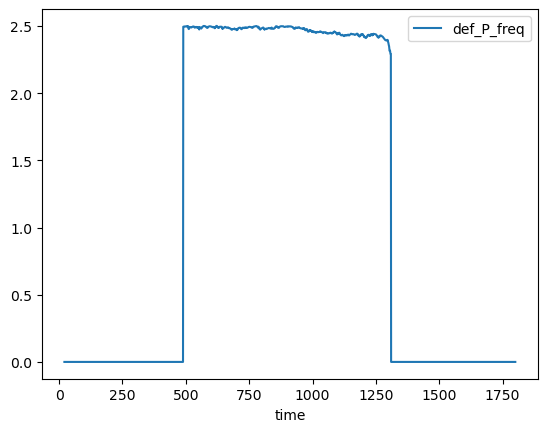

In [287]:
# Поиск СК:
# Частота качаний def_P_freq
df.dropna().plot(x="time", y=["def_P_freq"])

<Axes: xlabel='time'>

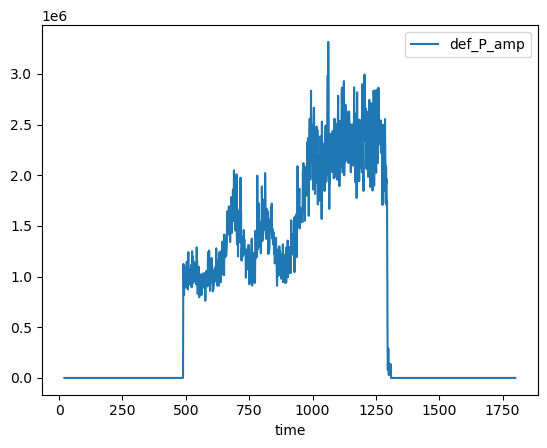

In [288]:
# Поиск СК:
# Частота качаний def_P_freq
df.dropna().plot(x="time", y=["def_P_amp"])

<Axes: >

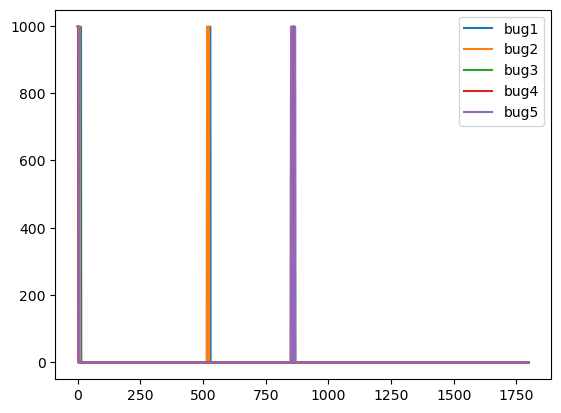

In [289]:
# СМСР_EXT:
# Таблица bug 
df_ext = pd.read_csv('./SMSR_SIG_EXT_data_Gus.csv', sep=';', encoding="windows-1251")
diagno = df_ext[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
diagno.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
diagno.plot()

<Axes: >

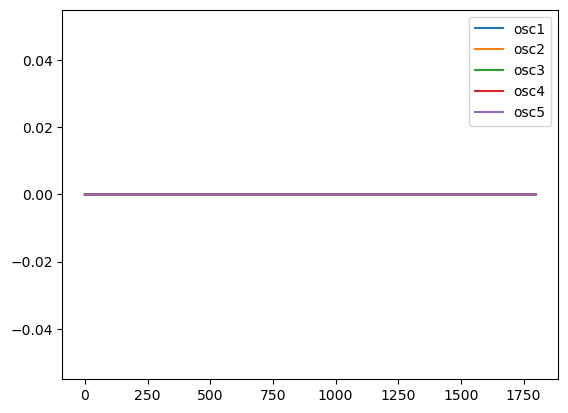

In [290]:
# СМСР_EXT:
# Таблица osc1-osc5: результаты
osh = df_ext[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
osh.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]
osh.plot()

In [291]:
# СМСР_EXT:
# Таблица osc1-osc5: типы данных
results_osc = df_ext[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
results_osc.columns = ["osc1_f", "osc1_phi", "osc1_n", "osc2_f", "osc2_phi", "osc2_n", "osc3_f", "osc3_phi", "osc3_n", "osc4_f", "osc4_phi", "osc4_n", "osc5_f", "osc5_amp"]
results_osc.describe()

,osc1_f,osc1_phi,osc1_n,osc2_f,osc2_phi,osc2_n,osc3_f,osc3_phi,osc3_n,osc4_f,osc4_phi,osc4_n,osc5_f,osc5_amp
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0
mean,0.004757,-0.492988,0.019444,0.003060,-0.725796,0.006667,0.028944,1.576371,0.025000,0.035156,-0.046859,0.003889,1.915128,0.0
std,0.035795,18.999815,0.138119,0.037729,9.152605,0.081400,0.231410,14.145386,0.156168,0.576436,2.535669,0.062257,0.720925,0.0
min,0.000000,-176.033000,0.000000,0.000000,-149.873000,0.000000,0.000000,-79.600000,0.000000,0.000000,-51.537000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.296250,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.434000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.482250,0.0
max,0.396000,173.279000,1.000000,0.646000,0.000000,1.000000,2.537000,179.264000,1.000000,10.613000,74.459000,1.000000,2.616000,0.0


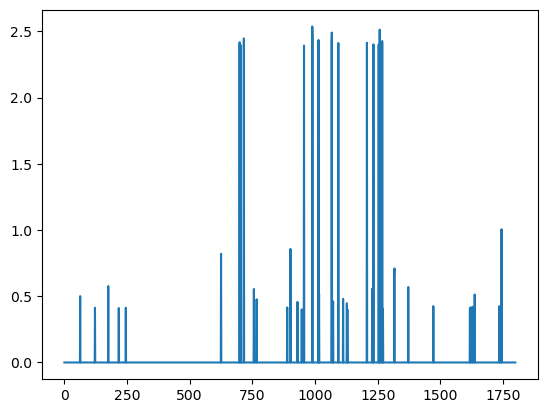

In [292]:
# СМСР_EXT:
# Частота по osc3 (качания по реактивной мощности)
plt.plot(results_osc["osc3_f"])

<Axes: xlabel='time'>

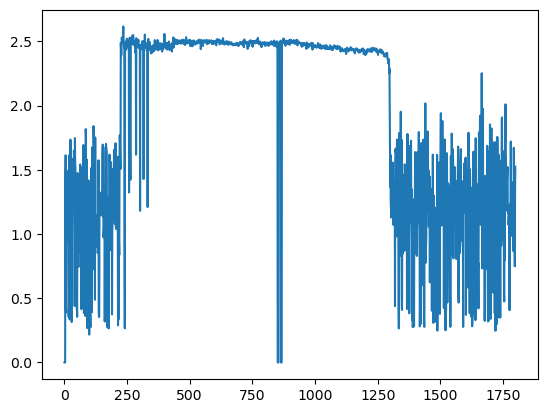

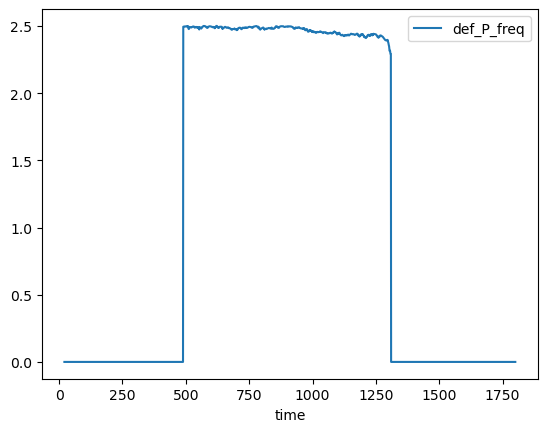

In [293]:
# СМСР_EXT:
# Частота по osc5 (качания по активной мощности)
plt.plot(results_osc["osc5_f"])
df.dropna().plot(x="time", y=["def_P_freq"])

<Axes: >

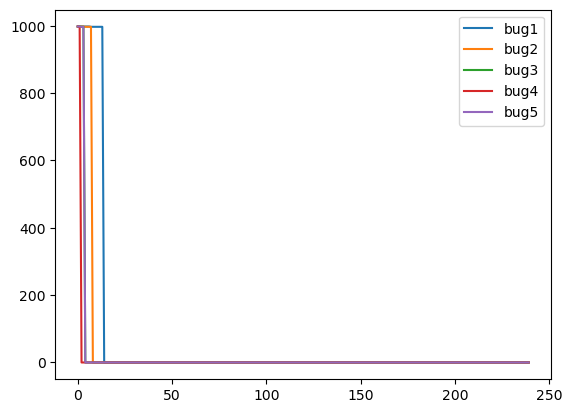

In [294]:
# Случай: Светлинская станция
df_ext = pd.read_csv('./SMSR_SIG_EXT_data_Svet_1.csv', sep=';', encoding="windows-1251")
diagno = df_ext[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
diagno.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
diagno.plot()

<Axes: >

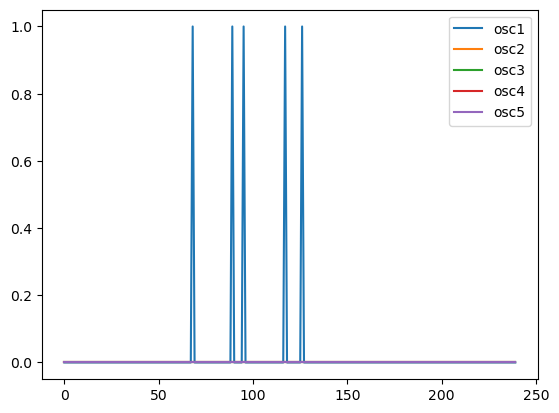

In [295]:
osh = df_ext[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
osh.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]
osh.plot()

In [296]:
results_osc = df_ext[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
results_osc.columns = ["osc1_f", "osc1_phi", "osc1_n", "osc2_f", "osc2_phi", "osc2_n", "osc3_f", "osc3_phi", "osc3_n", "osc4_f", "osc4_phi", "osc4_n", "osc5_f", "osc5_amp"]
results_osc.describe()

,osc1_f,osc1_phi,osc1_n,osc2_f,osc2_phi,osc2_n,osc3_f,osc3_phi,osc3_n,osc4_f,osc4_phi,osc4_n,osc5_f,osc5_amp
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0
mean,0.162017,-27.447329,0.458333,0.023992,-2.224687,0.054167,0.025600,-1.634483,0.041667,0.020154,-0.746225,0.004167,0.519458,0.0
std,0.177130,32.739900,0.499302,0.101504,10.133580,0.226819,0.153097,15.905626,0.200244,0.312227,11.560468,0.064550,0.365907,0.0
min,0.000000,-136.243000,0.000000,0.000000,-79.952000,0.000000,0.000000,-85.504000,0.000000,0.000000,-179.094000,0.000000,0.000000,0.0
25%,0.000000,-57.297750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.343000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.0
75%,0.347000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458250,0.0
max,0.395000,0.000000,1.000000,0.646000,0.000000,1.000000,1.912000,156.724000,1.000000,4.837000,0.000000,1.000000,1.995000,0.0


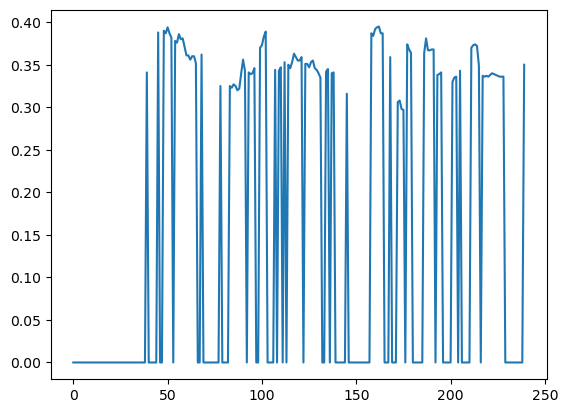

In [297]:
plt.plot(results_osc["osc1_f"])

In [298]:
df = pd.read_csv('./data_Svet_original.csv', sep=';', encoding="windows-1251", decimal=',')
df.columns = ["TimeUTC", "Fg", "Ug", "Pg", "Qg", "If", "Uf", "def_P_amp", "def_P_angl", "def_P_freq", "Fg_", "Ug_", "Pg_", "Qg_", "If_", "Uf_", "def_P_amp_", "def_P_angl_", "def_P_freq_", "Fg__", "Ug__", "Pg__", "Qg__", "If__", "Uf__", "def_P_amp__", "def_P_angl__", "def_P_freq__"]
df["time"] = ((pd.to_datetime(df["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
df.head()

C:\Users\das\AppData\Local\Temp\ipykernel_19800\2828816049.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["time"] = ((pd.to_datetime(df["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
C:\Users\das\AppData\Local\Temp\ipykernel_19800\2828816049.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["time"] = ((pd.to_datetime(df["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3


,TimeUTC,Fg,Ug,Pg,Qg,If,Uf,def_P_amp,def_P_angl,def_P_freq,...,Fg__,Ug__,Pg__,Qg__,If__,Uf__,def_P_amp__,def_P_angl__,def_P_freq__,time
0,21.10.2023 02:30:00.000000,49.944798,7759.234375,36550336,-16099690,694.046021,105.877075,NaN,NaN,NaN,...,49.944519,7758.998535,35296284,-16870508,685.047791,94.861206,NaN,NaN,NaN,0.00
1,21.10.2023 02:30:00.020000,49.943401,7758.770996,36533876,-16087406,693.825073,97.048218,NaN,NaN,NaN,...,49.943481,7758.393555,35280492,-16864828,680.617126,96.098755,NaN,NaN,NaN,0.02
2,21.10.2023 02:30:00.040000,49.943420,7759.006348,36519912,-16085237,691.652222,101.479370,NaN,NaN,NaN,...,49.943405,7758.582520,35278696,-16876916,684.210083,102.407471,NaN,NaN,NaN,0.04
3,21.10.2023 02:30:00.060000,49.944153,7759.307129,36480964,-16070926,691.024780,109.078491,NaN,NaN,NaN,...,49.944054,7758.832520,35259680,-16881634,680.903992,106.040771,NaN,NaN,NaN,0.06
4,21.10.2023 02:30:00.080000,49.944199,7759.067383,36415316,-16060359,691.216431,109.006470,NaN,NaN,NaN,...,49.944351,7758.722656,35220600,-16865238,681.176086,100.980225,NaN,NaN,NaN,0.08


<Axes: xlabel='time'>

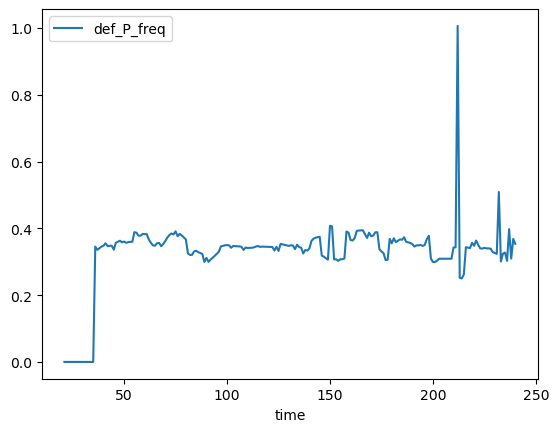

In [299]:
df.dropna().plot(x="time", y=["def_P_freq"])